In [ ]:
!pip install top2vec
!pip install top2vec[sentence_transformers]
!pip install top2vec[sentence_encoders]

In [3]:
from top2vec import Top2Vec
import pandas as pd 

df = pd.read_csv("inaug_speeches.csv", engine='python', encoding= 'latin1')
df.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again cal...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in ..."
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CA...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to ..."


In [8]:
import re, string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, 
    remove punctuation, remove read errors,
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', ' ', text)
    text = re.sub('�', ' ', text)
    return text
    
cleaned_text = lambda x: clean_text(x)

# Clean Speech Text
df["text"] = df["text"].apply(cleaned_text)

# Visually Inspect
df.head()

,Unnamed: 0,Name,Inaugural Address,Date,text
0,4,George Washington,First Inaugural Address,"Thursday, April 30, 1789",fellow citizens of the senate and o...
1,5,George Washington,Second Inaugural Address,"Monday, March 4, 1793",fellow citizens i am again cal...
2,6,John Adams,Inaugural Address,"Saturday, March 4, 1797",when it was first perceived in ...
3,7,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",friends and fellow citizens ca...
4,8,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805",proceeding fellow citizens to ...


In [9]:
df = df[['Name', 'text']]
df.head(2)

,Name,text
0,George Washington,fellow citizens of the senate and o...
1,George Washington,fellow citizens i am again cal...


In [10]:
# Training top2vec model with inaug_speeches data , dataset link : https://www.kaggle.com/datasets/adhok93/presidentialaddress
model = Top2Vec(df.text.values, embedding_model='universal-sentence-encoder')

''' Models Available 
universal-sentence-encoder
universal-sentence-encoder-multilingual
distiluse-base-multilingual-cased
'''

2022-06-16 07:44:00,158 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2022-06-16 07:44:00,613 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2022-06-16 07:44:19,804 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-16 07:44:21,623 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., T

In [11]:
model.get_num_topics()

2

In [12]:
# get keywords for each topic 
model.topic_words

array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
        'democracy', 'constitution', 'nation', 'citizen', 'prosperity',
        'against', 'respect', 'civil', 'freedom', 'without', 'honor',
        'equal', 'congress', 'government', 'whose', 'who', 'liberty',
        'powers', 'principles', 'national', 'rights', 'states',
        'ourselves', 'principle', 'necessary', 'governments', 'nor',
        'authority', 'shall', 'among', 'duty', 'even', 'free',
        'executive', 'administration', 'each', 'between', 'every',
        'others', 'under', 'president', 'called', 'individual', 'both',
        'of'],
       ['freedom', 'prosperity', 'nation', 'citizens', 'countrymen',
        'liberty', 'democracy', 'republic', 'citizen', 'oath', 'equal',
        'peace', 'against', 'nations', 'without', 'constitutional',
        'ourselves', 'beyond', 'free', 'constitution', 'respect',
        'honor', 'who', 'national', 'president', 'strength', 'necessary',
        'america'

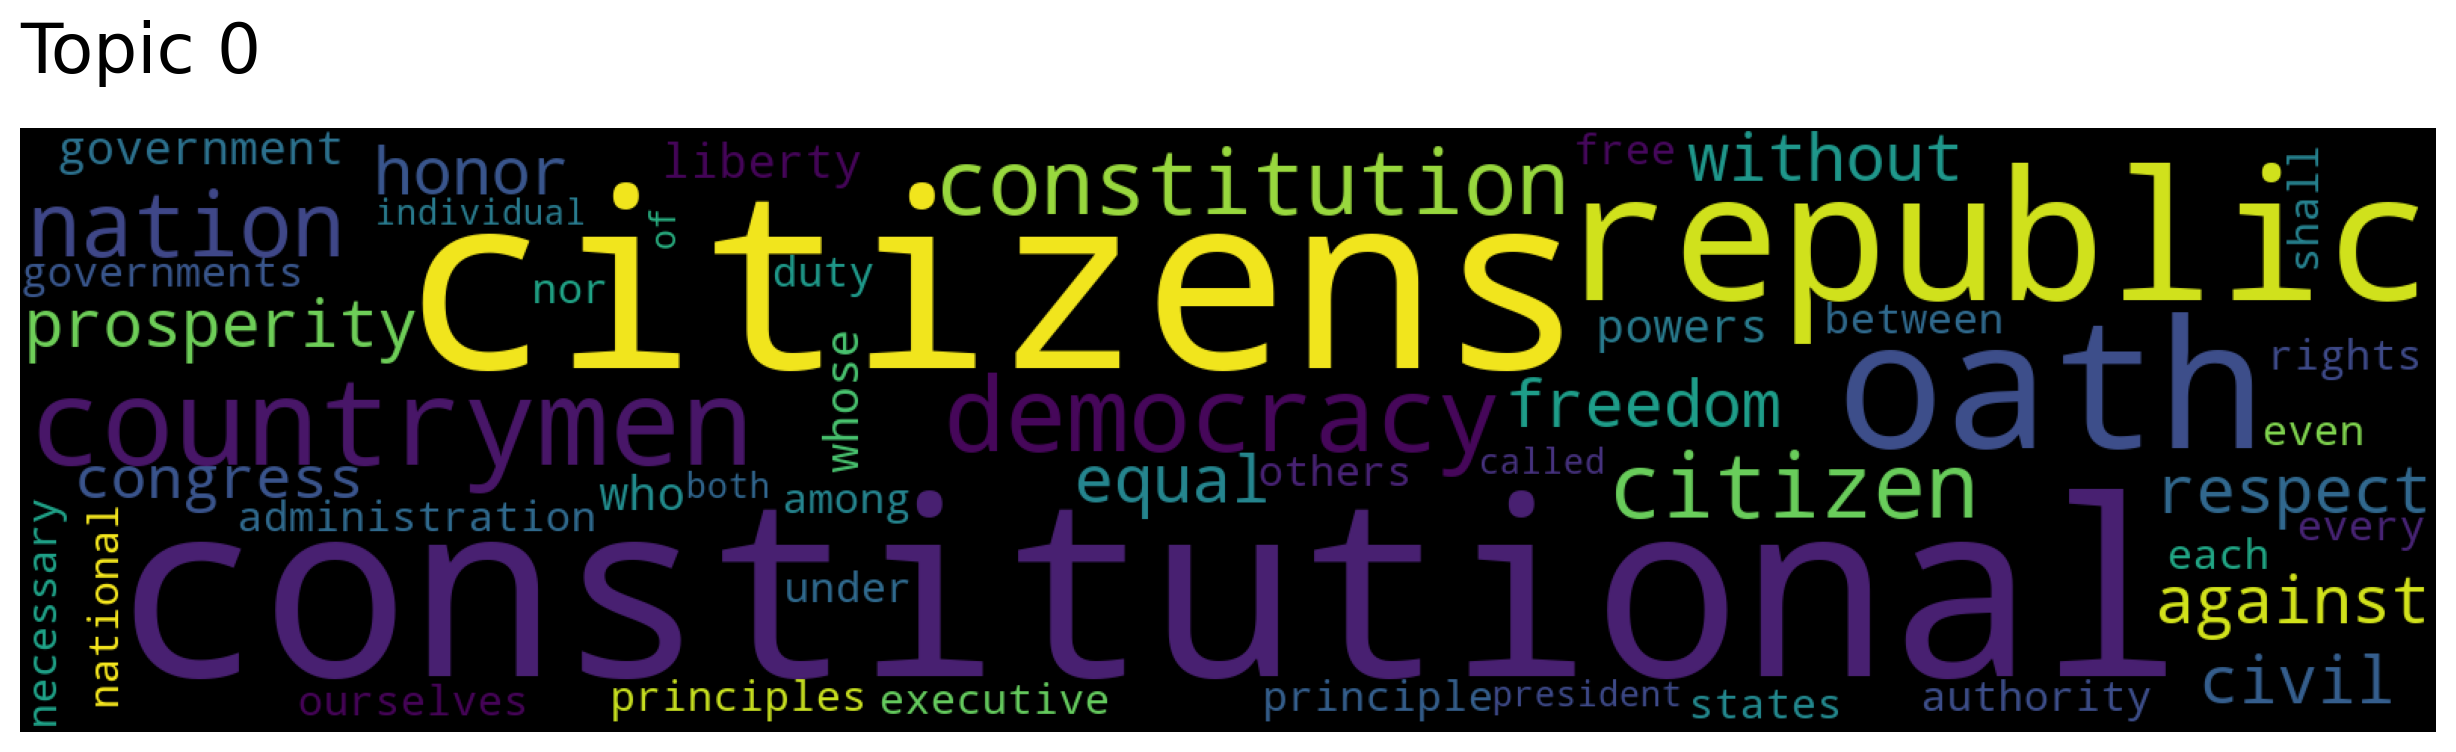

In [13]:
model.generate_topic_wordcloud(0)

In [18]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["citizens"], num_topics=2)
print(f"No of topics : {len(topic_nums)} and words are {topic_words[0]}")

No of topics : 2 and words are ['constitutional' 'citizens' 'republic' 'oath' 'countrymen' 'democracy'
 'constitution' 'nation' 'citizen' 'prosperity' 'against' 'respect'
 'civil' 'freedom' 'without' 'honor' 'equal' 'congress' 'government'
 'whose' 'who' 'liberty' 'powers' 'principles' 'national' 'rights'
 'states' 'ourselves' 'principle' 'necessary' 'governments' 'nor'
 'authority' 'shall' 'among' 'duty' 'even' 'free' 'executive'
 'administration' 'each' 'between' 'every' 'others' 'under' 'president'
 'called' 'individual' 'both' 'of']


In [21]:
topic_words, word_scores, topic_nums = model.get_topics(1)
print(topic_words)

[['constitutional' 'citizens' 'republic' 'oath' 'countrymen' 'democracy'
  'constitution' 'nation' 'citizen' 'prosperity' 'against' 'respect'
  'civil' 'freedom' 'without' 'honor' 'equal' 'congress' 'government'
  'whose' 'who' 'liberty' 'powers' 'principles' 'national' 'rights'
  'states' 'ourselves' 'principle' 'necessary' 'governments' 'nor'
  'authority' 'shall' 'among' 'duty' 'even' 'free' 'executive'
  'administration' 'each' 'between' 'every' 'others' 'under' 'president'
  'called' 'individual' 'both' 'of']]


In [22]:
# to get similar words : Semantic Search
words, word_scores = model.similar_words(keywords=["constitutional"], keywords_neg=[], num_words=20)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

constitution 0.7288548891777089
citizen 0.4723290988168851
citizens 0.4502901978727408
oath 0.430887191231749
government 0.4204032301028167
law 0.4152112776782078
rights 0.41506158969869855
congress 0.3923969740586745
democracy 0.3910433332140063
laws 0.37440227253656755
american 0.37049017996101846
president 0.36987784447077826
commerce 0.368667863317993
states 0.36404274276619314
state 0.3631170358867932
liberty 0.36074777573782213
foreign 0.3518555599625002
duties 0.3516476103913455
federal 0.35102676632961854
countrymen 0.3505416958618698


In [23]:
documents, document_scores, document_ids = model.search_documents_by_keywords(keywords=["government", "citizen"], num_docs=5)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 1, Score: 0.21117602449476205
-----------
            fellow citizens     i am again called upon by the voice of my country to execute the functions of its chief magistrate  when the occasion proper for it shall arrive  i shall endeavor to express the high sense i entertain of this distinguished honor  and of the confidence which has been reposed in me by the people of united america       previous to the execution of any official act of the president the constitution requires an oath of office  this oath i am now about to take  and in your presence  that if it shall be found during my administration of the government i have in any instance violated willingly or knowingly the injunctions thereof  i may  besides incurring constitutional punishment  be subject to the upbraidings of all who are now witnesses of the present solemn ceremony              
-----------

Document: 2, Score: 0.18706514636673974
-----------
              when it was first perceived  in early times  that

In [24]:
# to access the topic vectors for each topics
model.topic_vectors

array([[-0.03240328, -0.06166243, -0.02745233, ...,  0.04508633,
        -0.04117269,  0.04916515],
       [-0.0502777 , -0.06314228, -0.02798648, ...,  0.05642398,
        -0.00569224,  0.00679894]], dtype=float32)

In [26]:
# use the embedding model used by the Top2Vec model to generate document embeddings for any section of text
embedding_vector = model.embed(["fellow citizens of the senate and of the house of representatives"])
embedding_vector.shape

TensorShape([1, 512])

In [28]:
# to reduce the number of topics
topic_mapping = model.hierarchical_topic_reduction(num_topics=1)

In [30]:
model.topic_words_reduced[0]

array(['citizens', 'republic', 'countrymen', 'constitutional', 'oath',
       'nation', 'democracy', 'prosperity', 'citizen', 'freedom',
       'constitution', 'against', 'liberty', 'equal', 'without',
       'respect', 'honor', 'who', 'civil', 'ourselves', 'national',
       'principles', 'whose', 'free', 'peace', 'necessary', 'powers',
       'beyond', 'nations', 'nor', 'congress', 'government',
       'governments', 'individual', 'even', 'every', 'rights',
       'president', 'shall', 'states', 'each', 'under', 'principle',
       'both', 'among', 'strength', 'greater', 'itself', 'between',
       'duty'], dtype='<U14')

In [33]:
# to save and load the model 

model.save("inaug_speeches")
model = Top2Vec.load("inaug_speeches")

In [37]:
model.get_topics()[0]

array([['constitutional', 'citizens', 'republic', 'oath', 'countrymen',
        'democracy', 'constitution', 'nation', 'citizen', 'prosperity',
        'against', 'respect', 'civil', 'freedom', 'without', 'honor',
        'equal', 'congress', 'government', 'whose', 'who', 'liberty',
        'powers', 'principles', 'national', 'rights', 'states',
        'ourselves', 'principle', 'necessary', 'governments', 'nor',
        'authority', 'shall', 'among', 'duty', 'even', 'free',
        'executive', 'administration', 'each', 'between', 'every',
        'others', 'under', 'president', 'called', 'individual', 'both',
        'of'],
       ['freedom', 'prosperity', 'nation', 'citizens', 'countrymen',
        'liberty', 'democracy', 'republic', 'citizen', 'oath', 'equal',
        'peace', 'against', 'nations', 'without', 'constitutional',
        'ourselves', 'beyond', 'free', 'constitution', 'respect',
        'honor', 'who', 'national', 'president', 'strength', 'necessary',
        'america'